# <center>TYPOWE PROBLEMY ROZWIĄZYWANE DYNAMICZNIE</center>

1. Problem plecakowy (Knapsack problem)

Mamy zbiór przedmiotów $I=\{0, ...,n-1\}$
 - Każdy z nich ma wagę $w: I \rightarrow \N$ - wagi
 - oraz cenę $p: I \rightarrow \N$ - cena
 - $B \in \N$ - maksymalna waga

Należy znaleźć podzbiór przedmiotów, których łączna waga nie przekracza $B$ i których łączna cena jest maksymalna.

$1)$ Funkcja do obliczania
 - $f(i,b)=$ maksymalna suma cen przedmiotów, ze zbioru: $\{0, ...,i\}$, których łączna waga nie przekracza $b$

$2)$ Sformułowanie rekurencyjne
 - $f(i,b)=max{\begin{cases} f(i-1,b) - \text{nie bierzemy i-tego przedmiotu}, & \\ f(i-1,b-w(i)) + p(i) -\text{bierzemy i-ty przedmiot} \end{cases}}$
 - przy założeniu, że $b-w(i) \geq 0$, inaczej zerujemy drugą część funkcji
 - $f(0,b)=\begin{cases} p(0) , w(0) \leq b , & \\ 0, w(0) > b \end{cases}$
  
$3)$ Implementacja



In [3]:
def knapsack(W,P,B):
    n=len(W)
    F=[[0 for _ in range(B+1)] for _ in range(n)]
    parent=[[False for _ in range(B+1)] for _ in range(n)]
    I=[]
    for b in range(W[0],B+1):
        F[0][b]=P[0]
    for b in range(B+1):
        for i in range(1,n):
            F[i][b]=F[i-1][b]
            if b-W[i]>=0:
                F[i][b]=max(F[i][b],F[i-1][b-W[i]]+P[i])
                parent[i][b]=True
    i=n-1
    j=B
    while j>=0  and i>=0:
        if parent[i][j]:
            I.append(i)
            j-=W[i]
            i-=1
        else:
            i-=1

    return F[n-1][B], I

W1=[10, 20, 30]
P1=[60, 100, 120]

def knapsack_check(W,P,B):
    val,items=knapsack(W,P,B)
    print('max weight:',B)
    print('weights: ', W)
    print('prices: ', P)
    print('maximum value: ', val)
    print('items taken: ', items)


knapsack_check(W1,P1,50)

max weight: 50
weights:  [10, 20, 30]
prices:  [60, 100, 120]
maximum value:  220
items taken:  [2, 1]


2. Problem komiwojażera (travelling salesman problem, TSP)

Mamy dane:
 - zbiór miast: $C=\{0,..., n-1\}$
 - metrykę $d: C\times C \rightarrow \R$ - odległość między miastami

Należy znaleźć kolejność odwiedzania miast:
 - tak aby zacząć od miasta $0$, 
 - skończyć w $0$, 
 - odwiedzić wszystkie miasta minimalizując sumę odległości między kolejnymi miastami.

Dla uproszczenia rozważamy miasta na płaskim planie ($2D$)

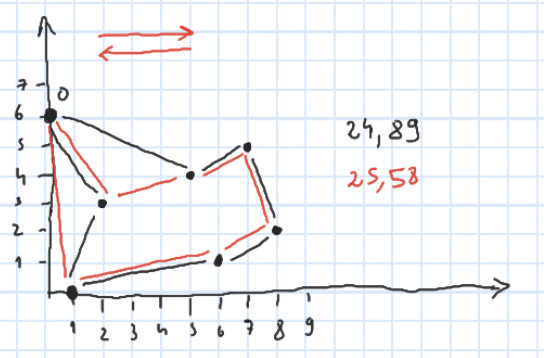

Algorytm Brute-Force:
 - $O(n!)$ - pełny przegląd wszystkich tras

Algorytm dynamiczny w przypadku ogólnym:
 - zapis rekurencyjny:
    - $f(S,t)=$ długość najkrótszej trasy, która startuje w $0$, odwiedza wszystkie miasta ze zbioru $S$ i kończy w mieście $t$ ($0 \in S, t \in S$)
    - $f(S,t) = \underset{r \in S -\{t\}}{min} f(S-\{t\},r) + d(r,t)$
    - warunek brzegowy:
      - $f(\{0\},0)=0$
 - odczytywanie wyniku:
    - $\underset{t \in \{1,..., n-1\}}{min} f(C,t) + d(t,0)$
 - szacowanie złożoności:
    - $O(2^n \cdot n^2)$ 

Jak widać przy pomocy programownia dynamicznego można otrzymać o wiele lepszą złożoność obliczeniową.

Problem komiwojażera (wersja bitoniczna)

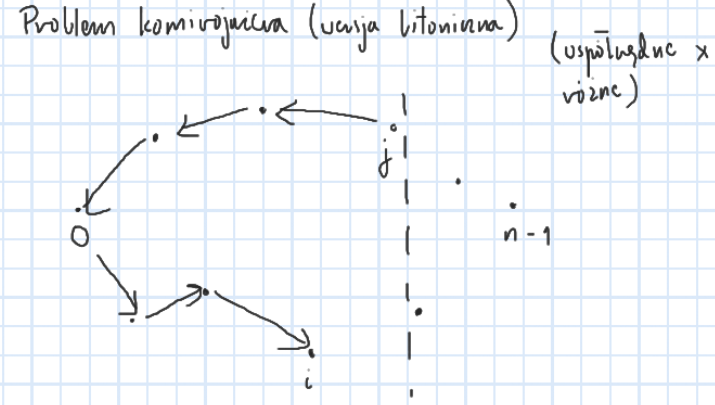

Idea: rozważamy ścieżkę $górną$ i $dolną$, jedną chcemy dojśc do miasta, drugą z niego wrócić. Dokładając kolejne miasta będziemy jedną z nich rozszerzać.

Funkcja:
 - $\underset{i < j}{f(i,j)}=$ koszt ścieżek z $0$ do $i$ oraz z $0$ do $j$, które odwiedzają wszystkie miasta $\{0,1,...j\}$ i żadnego nie powtarzają.
 - warunek brzegowy:
    - $f(0,1)=d(0,1)$

Zapis rekurencyjny:
 - przypadek $I: i<j-1$ </br></br>
  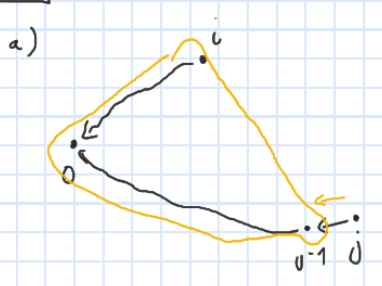

   - $f(i,j)=f(i,j-1)+d(j-1,j)$
 - przypadek $II$: </br></br>
  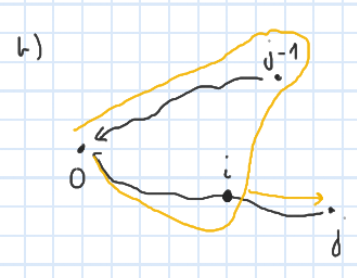

  - $f(j-1,j)= \underset{i<j-1}{min} f(i,j-1)+d(i,j)$

Implementacja (rekurencja ze spamiętywaniem):
 - złożoność: $O(n^2)$, dzięki spamiętywaniu - wtedy tyko raz uzupełniamy wartość

In [ ]:
def tsp(D,n):
    from math import inf
    F=[[inf for _ in range(n)] for _ in range(n)]
    F[0][1]=D[0][1]
    
    def tspf(i,j,F,D):
        if F[i][j]!=inf: return F[i][j]
        
        if i==j-1:
            best=inf
            for c in range(j-1):
                best=min(best,tspf(c,j-1,F,D))
            F[j-1][j]=best
        else:
            F[i][j]=tspf(i,j-1,F,D)+D[j-1][j]
        
        return F[i][j]